# Project: Investigate a Dataset (Gun Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


>This analyses the FBI gun dataset gotten from the FBI's National Instant Criminal Background Check System [NICS](https://d17h27t6h515a5.cloudfront.net/topher/2017/November/5a0a4db8_gun-data/gun-data.xlsx). The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from [census.gov](https://www.census.gov/).
>
>The main goal is to find out the states with ***the strictest gun laws*** over the years



In [1]:
# Importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Loading in the data and checking for cleanliness followed by trimming and cleaning of the dataset where neccessary for further analysis.

### General Properties
> I have two datasets here ; the first is the gun dataset in an excel format and census data set in a CSV format

In [2]:
#Loading in the datasets
gun_df=pd.read_excel('gun_data.xlsx')
census_df=pd.read_csv('US_Census_Data.csv')

In [3]:
#preview of the gun dataset
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
#preview of census dataset
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


### Data Cleaning (both Gun and Census datasets)

>Starting with the gun dataset first

In [5]:
gun_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [6]:
#Checking general properties of the data set
print('Shape of data set :',census_df.shape)
print()
gun_df.info()

Shape of data set : (85, 52)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_

> There are missing values in so many rows as seen above and number of guns in the data set should be presented as integers not floats

In [7]:
#Sum of missing values for every column
gun_df.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [8]:
#checking percentages of missing data in each column
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values()
    return percent_nan

In [9]:
percent_missing(gun_df)

long_gun                      0.152183
handgun                       0.160192
admin                         0.184221
permit                        0.192231
redemption_handgun           15.538646
redemption_long_gun          15.546656
prepawn_handgun              15.562675
prepawn_long_gun             15.578694
other                        55.947137
redemption_other             59.030837
prepawn_other                59.030837
return_to_seller_long_gun    77.973568
private_sale_handgun         77.973568
private_sale_long_gun        77.973568
private_sale_other           77.973568
return_to_seller_handgun     80.176211
return_to_seller_other       81.938326
returned_handgun             82.378855
returned_long_gun            82.819383
returned_other               85.462555
permit_recheck               91.189427
rentals_handgun              92.070485
rentals_long_gun             93.392070
dtype: float64

> After delibrating on the information I have decided to drop columns which have more than 50 percent of their data missing as most of them wont be useful in further investigations on the dataset 

In [10]:
#getting columns with more than 50 percent of data missing
missing_series=percent_missing(gun_df)
to_drop= list(missing_series[missing_series>50].sort_values().index)

In [11]:
#dropping columns
gun_df.drop(to_drop,axis=1,inplace=True)
percent_missing(gun_df)

long_gun                0.152183
handgun                 0.160192
admin                   0.184221
permit                  0.192231
redemption_handgun     15.538646
redemption_long_gun    15.546656
prepawn_handgun        15.562675
prepawn_long_gun       15.578694
dtype: float64

In [12]:
#dropping all null values since there are small compared to the rest of the dataset
gun_df.dropna(inplace=True)
percent_missing(gun_df)

Series([], dtype: float64)

In [13]:
#checking for duplicates
gun_df.duplicated().sum()

0

In [14]:
gun_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10530 entries, 0 to 10559
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                10530 non-null  object 
 1   state                10530 non-null  object 
 2   permit               10530 non-null  float64
 3   handgun              10530 non-null  float64
 4   long_gun             10530 non-null  float64
 5   multiple             10530 non-null  int64  
 6   admin                10530 non-null  float64
 7   prepawn_handgun      10530 non-null  float64
 8   prepawn_long_gun     10530 non-null  float64
 9   redemption_handgun   10530 non-null  float64
 10  redemption_long_gun  10530 non-null  float64
 11  totals               10530 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.0+ MB


>finally convering float object types to integers

In [15]:
gun_columns=list(gun_df.columns)

#function to change floats to integers
def to_integer(val):
    if type(val) == float:
        return int(val)
    else:
        return val

In [16]:
#applying function to dataframe
for column in gun_columns:
    gun_df[column]=gun_df[column].apply(to_integer)

gun_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10530 entries, 0 to 10559
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                10530 non-null  object
 1   state                10530 non-null  object
 2   permit               10530 non-null  int64 
 3   handgun              10530 non-null  int64 
 4   long_gun             10530 non-null  int64 
 5   multiple             10530 non-null  int64 
 6   admin                10530 non-null  int64 
 7   prepawn_handgun      10530 non-null  int64 
 8   prepawn_long_gun     10530 non-null  int64 
 9   redemption_handgun   10530 non-null  int64 
 10  redemption_long_gun  10530 non-null  int64 
 11  totals               10530 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 1.0+ MB


>dataset is ready for exploration

#### Census dataset

In [17]:
census_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


> we can already see missing data from the preview of the data set and after going through the dataset i have seen the only information i need for further analysis are contained in the first four rows of the dataset in which ive decided to drop the rest and will transpose the dataset for better viewing/reading

In [18]:
census=census_df.iloc[:4].transpose()
census.head()

,0,1,2,3
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010"
Fact Note,NaN,NaN,NaN,NaN
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736"
Alaska,"741,894","710,249",4.50%,"710,231"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017"


In [19]:
#renaming column headers
census.columns = census.iloc[0]
census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010"
Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010"
Fact Note,NaN,NaN,NaN,NaN
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736"
Alaska,"741,894","710,249",4.50%,"710,231"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017"


In [20]:
#dropping the first row as its just the names 
census.drop(['Fact'],axis=0,inplace=True)

In [21]:
census

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010"
Fact Note,NaN,NaN,NaN,NaN
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736"
Alaska,"741,894","710,249",4.50%,"710,231"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918"
California,"39,250,017","37,254,522",5.40%,"37,253,956"
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196"
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097"
Delaware,"952,065","897,936",6.00%,"897,934"
Florida,"20,612,439","18,804,592",9.60%,"18,801,310"


In [22]:
#Checking general properties of the data set
print('Shape of data set :',census_df.shape)
print()
census.info()

Shape of data set : (85, 52)

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Fact Note to Wyoming
Data columns (total 4 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Population estimates, July 1, 2016,  (V2016)                                           50 non-null     object
 1   Population estimates base, April 1, 2010,  (V2016)                                     50 non-null     object
 2   Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)  50 non-null     object
 3   Population, Census, April 1, 2010                                                      50 non-null     object
dtypes: object(4)
memory usage: 2.0+ KB


> There are missing values in the dataset and values are being represented as strings with the 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)' column having percent signs and the rest containing commas

In [23]:
census.isnull().sum()

Fact
Population estimates, July 1, 2016,  (V2016)                                             1
Population estimates base, April 1, 2010,  (V2016)                                       1
Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)    1
Population, Census, April 1, 2010                                                        1
dtype: int64

In [24]:
#dropping all null values as they are minimal
census.dropna(inplace=True)
census

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736"
Alaska,"741,894","710,249",4.50%,"710,231"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918"
California,"39,250,017","37,254,522",5.40%,"37,253,956"
Colorado,"5,540,545","5,029,324",10.20%,"5,029,196"
Connecticut,"3,576,452","3,574,114",0.10%,"3,574,097"
Delaware,"952,065","897,936",6.00%,"897,934"
Florida,"20,612,439","18,804,592",9.60%,"18,801,310"
Georgia,"10,310,371","9,688,680",6.40%,"9,687,653"


> Now i have to deal with the value types in a similar way i did with the guns dataset

In [25]:
census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010"
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736"
Alaska,"741,894","710,249",4.50%,"710,231"
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017"
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918"
California,"39,250,017","37,254,522",5.40%,"37,253,956"


In [26]:
#getting column names to use in the coming functions
census_columns=list(census.columns)
census_columns

['Population estimates, July 1, 2016,  (V2016)',
 'Population estimates base, April 1, 2010,  (V2016)',
 'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
 'Population, Census, April 1, 2010']

In [27]:
#function to do all the heavy work
def repair(val):
    if type(val) == str:
        if '%' in val :
            return float(val.replace("%",""))
        elif '.' in val:
            return float(val)
        else:
            return int(val.replace(",",""))
        
    else:
        return val

In [28]:
#applying function to dataframe
for columns in census_columns:
    census[columns]=census[columns].apply(repair)

In [29]:
census.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010"
Alabama,4863300,4780131,1.7,4779736
Alaska,741894,710249,4.5,710231
Arizona,6931071,6392301,8.4,6392017
Arkansas,2988248,2916025,2.5,2915918
California,39250017,37254522,5.4,37253956


In [30]:
#check for duplicates
census.duplicated().sum()

0

>All done, dataset is ready 

<a id='eda'></a>
## Exploratory Data Analysis




### Statistical Summary

In [31]:
gun_df.describe()

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
count,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000,10530.000000
mean,7269.029630,6410.507407,7942.553086,291.888604,36.320513,4.833048,7.841026,408.484425,600.003134,23297.853466
std,25682.065872,9066.756639,9428.874985,845.494220,442.101356,10.912853,16.474243,783.878283,952.518404,34685.810276
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1030.250000,2221.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5159.000000
50%,744.500000,3398.500000,5187.000000,139.000000,0.000000,0.000000,1.000000,40.000000,176.000000,13282.500000
75%,5129.500000,7986.500000,10553.500000,329.000000,0.000000,5.000000,8.000000,562.000000,872.750000,27501.500000
max,522188.000000,107224.000000,108058.000000,38907.000000,28083.000000,164.000000,269.000000,10046.000000,8831.000000,541978.000000


In [32]:
census.describe()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010"
count,5.000000e+01,5.000000e+01,50.000000,5.000000e+01
mean,6.448927e+06,6.163127e+06,3.120700,6.162876e+06
std,7.271769e+06,6.848463e+06,3.366857,6.848235e+06
min,5.855010e+05,5.637670e+05,-1.200000,5.636260e+05
25%,1.850106e+06,1.833003e+06,0.069250,1.833004e+06
50%,4.559320e+06,4.436412e+06,2.050000,4.436370e+06
75%,7.198768e+06,6.680362e+06,5.075000,6.680312e+06
max,3.925002e+07,3.725452e+07,10.800000,3.725396e+07


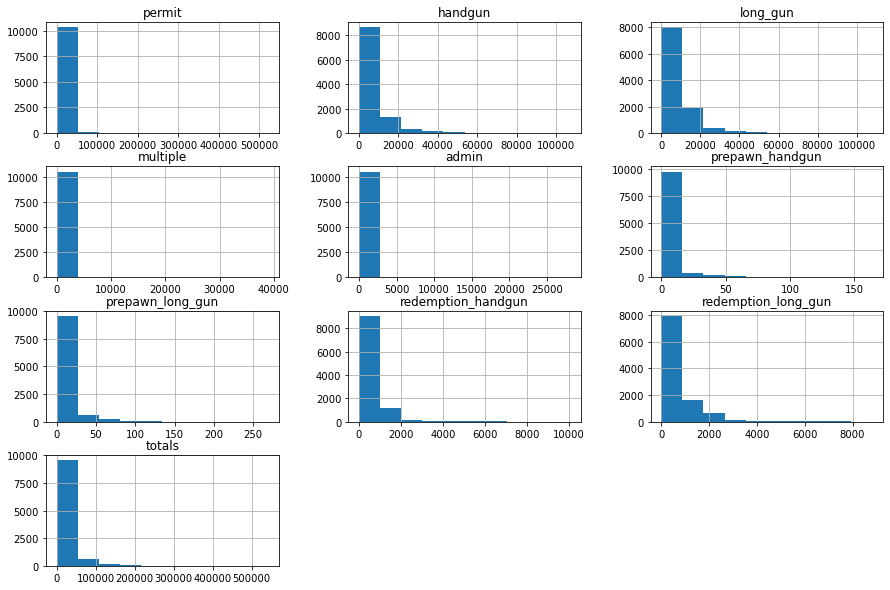

In [33]:
gun_df.hist(figsize=(15,10));

### Research Question 1 (States with the strictest gun laws over the years)

> Adding a columns for years and another column 'licensed_guns' which shows the percentage of guns which are licensed

In [34]:
#converting month column to datetime variable for easy operations and Adding Year column
gun_df['month']=pd.to_datetime(gun_df['month'])
gun_df['year']=gun_df['month'].dt.year
gun_df.head()

,month,state,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals,year
0,2017-09-01,Alabama,16717,5734,6320,317,0,15,21,1378,1262,32019,2017
1,2017-09-01,Alaska,209,2320,2930,160,0,5,2,200,154,6303,2017
2,2017-09-01,Arizona,5069,11063,7946,631,0,13,6,1474,748,28394,2017
3,2017-09-01,Arkansas,2935,4347,6063,366,51,12,13,1296,1824,17747,2017
4,2017-09-01,California,57839,37165,24581,0,0,0,0,535,397,123506,2017


In [35]:
#adding licensed_gun column
gun_df['licensed_gun%']=gun_df['permit']/gun_df['totals'] *100
gun_df.head()

,month,state,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals,year,licensed_gun%
0,2017-09-01,Alabama,16717,5734,6320,317,0,15,21,1378,1262,32019,2017,52.209626
1,2017-09-01,Alaska,209,2320,2930,160,0,5,2,200,154,6303,2017,3.315881
2,2017-09-01,Arizona,5069,11063,7946,631,0,13,6,1474,748,28394,2017,17.852363
3,2017-09-01,Arkansas,2935,4347,6063,366,51,12,13,1296,1824,17747,2017,16.538006
4,2017-09-01,California,57839,37165,24581,0,0,0,0,535,397,123506,2017,46.830923


In [36]:
#Getting all the years in the data frame
years=gun_df['year'].value_counts().index.sort_values()

In [37]:
#Getting states with the strictest gun laws over the years
print('The following are the states with stricktest gun laws over the years')
gun_df.groupby(['year','state'])['licensed_gun%'].max().groupby(level='year').nlargest(2).reset_index(level=0,drop=True)


#source : udacity reviews

The following are the states with stricktest gun laws over the years


year  state         
2001  Hawaii            100.000000
      Illinois           67.838738
2002  Hawaii            100.000000
      Illinois           72.102119
2003  Hawaii            100.000000
      Illinois           74.475930
2004  Hawaii            100.000000
      Illinois           78.781044
2005  Hawaii            100.000000
      Illinois           78.795072
2006  Hawaii            100.000000
      Virgin Islands     89.898990
2007  Hawaii            100.000000
      Kentucky           89.359371
2008  Hawaii            100.000000
      Kentucky           91.990464
2009  Hawaii            100.000000
      Kentucky           91.782083
2010  Hawaii            100.000000
      Utah               96.305971
2011  Hawaii            100.000000
      Utah               96.482435
2012  Hawaii            100.000000
      Kentucky           91.713262
2013  Hawaii            100.000000
      Virgin Islands     93.357934
2014  Hawaii            100.000000
      North Carolina     96.348560

> It is safe to say that Hawaii has the strictest gun laws of all the states with kentucky coming in second in recent years 

In [38]:
##Getting states with loose gun laws over the years
print('The following are the states with loose gun laws over the years')
gun_df.groupby(['year','state'])['licensed_gun%'].min().groupby(level='year').nsmallest(3).reset_index(level=0,drop=True)


The following are the states with loose gun laws over the years


year  state               
2001  Alabama                 0.0
      Alaska                  0.0
      Colorado                0.0
2002  Alabama                 0.0
      Alaska                  0.0
      Colorado                0.0
2003  Alabama                 0.0
      Alaska                  0.0
      Colorado                0.0
2004  Alabama                 0.0
      Alaska                  0.0
      Delaware                0.0
2005  Alabama                 0.0
      Alaska                  0.0
      Delaware                0.0
2006  Alabama                 0.0
      Alaska                  0.0
      Delaware                0.0
2007  Alabama                 0.0
      Alaska                  0.0
      Colorado                0.0
2008  Alabama                 0.0
      Alaska                  0.0
      Colorado                0.0
2009  Alabama                 0.0
      Alaska                  0.0
      Colorado                0.0
2010  Alaska                  0.0
      Colorado       

>New jersey has appeared twice over the years and need to implement the laws more

### Research Question 2  (Gun per capita for 2010 and 2016 using both census and gun datasets)

In [39]:
#Getting dataframes of 2016 and 2010 data
gun_2016=((gun_df[gun_df['year']==2016]).groupby('state').sum()).drop(['year','licensed_gun%'],axis=1)
gun_2010=((gun_df[gun_df['year']==2010]).groupby('state').sum()).drop(['year','licensed_gun%'],axis=1)

In [40]:
gun_2016.head()

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
state,,,,,,,,,,
Alabama,291039,153123,121963,6545,5,111,114,20036,17697,616947
Alaska,3121,37491,36887,2316,0,84,70,2234,2046,87647
Arizona,87771,166784,108988,7908,0,74,60,16576,8390,416279
Arkansas,55456,80244,82120,4400,143,77,116,12645,20532,266014
California,1036981,560355,554550,0,0,0,0,6752,6645,2377167


In [41]:
gun_2010.head()

,permit,handgun,long_gun,multiple,admin,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun,totals
state,,,,,,,,,,
Alabama,4621,116963,136519,5465,19,115,183,19574,23341,308607
Alaska,0,25720,33177,1519,0,85,122,2065,2393,65909
Arizona,24751,89162,69067,3768,0,57,38,10310,6793,206050
Arkansas,31305,49992,72206,3145,64,148,372,9655,23910,191448
California,295252,245159,275458,0,530,0,0,0,0,816399


In [42]:
#calculating gun per capita for both years
gun_capita2016=(gun_2016['totals']/census['Population estimates, July 1, 2016,  (V2016)']).sort_values(ascending=False)
gun_capita2016

Kentucky                0.828683
Indiana                 0.216601
Illinois                0.150300
West Virginia           0.132352
Montana                 0.130776
South Dakota            0.129321
Alabama                 0.126858
New Hampshire           0.123737
Alaska                  0.118140
Minnesota               0.118044
Wyoming                 0.108615
Tennessee               0.107466
Missouri                0.103778
Washington              0.097969
Colorado                0.097556
Wisconsin               0.097222
Utah                    0.096652
North Dakota            0.095040
Oklahoma                0.092923
Idaho                   0.092888
Mississippi             0.092401
Pennsylvania            0.089424
Arkansas                0.089020
Connecticut             0.088829
Maine                   0.083803
Louisiana               0.083703
South Carolina          0.081227
Oregon                  0.079324
New Mexico              0.077470
Ohio                    0.075400
Florida   

>Ran into nan values and after investigations i figured it was because those states were not present in both datasets so ive decided to drop them from the original dataset

In [43]:
#Source of code : https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
dropp=gun_df[(gun_df['state']=='District of Columbia') | (gun_df['state']=='Guam') |(gun_df['state']=='Mariana Islands') | (gun_df['state']=='Puerto Rico') |(gun_df['state']=='Virgin Islands')]
gun_df.drop(dropp.index,inplace = True)

In [44]:
#Getting dataframes of 2016 and 2010 data again
gun_2016=((gun_df[gun_df['year']==2016]).groupby('state').sum()).drop(['year','licensed_gun%'],axis=1)
gun_2010=((gun_df[gun_df['year']==2010]).groupby('state').sum()).drop(['year','licensed_gun%'],axis=1)

In [45]:
#trying code once more
gun_capita2016=(gun_2016['totals']/census['Population estimates, July 1, 2016,  (V2016)']).sort_values(ascending=False)
gun_capita2016

state
Kentucky          0.828683
Indiana           0.216601
Illinois          0.150300
West Virginia     0.132352
Montana           0.130776
South Dakota      0.129321
Alabama           0.126858
New Hampshire     0.123737
Alaska            0.118140
Minnesota         0.118044
Wyoming           0.108615
Tennessee         0.107466
Missouri          0.103778
Washington        0.097969
Colorado          0.097556
Wisconsin         0.097222
Utah              0.096652
North Dakota      0.095040
Oklahoma          0.092923
Idaho             0.092888
Mississippi       0.092401
Pennsylvania      0.089424
Arkansas          0.089020
Connecticut       0.088829
Maine             0.083803
Louisiana         0.083703
South Carolina    0.081227
Oregon            0.079324
New Mexico        0.077470
Ohio              0.075400
Florida           0.069635
Kansas            0.067605
Iowa              0.064528
Vermont           0.063108
Virginia          0.062813
Delaware          0.062422
Texas             0.06

> perfect everything seems good ,so the above is the gun per capita for the year 2016 ,now going to do the same for the year 2010

In [46]:
gun_capita2010=(gun_2010['totals']/census['Population estimates base, April 1, 2010,  (V2016)']).sort_values(ascending=False)
gun_capita2010

state
Kentucky          0.549756
Utah              0.200129
Montana           0.102177
Alaska            0.092797
West Virginia     0.086103
Wyoming           0.084625
South Dakota      0.077563
North Dakota      0.070002
Arkansas          0.065654
Tennessee         0.064766
Alabama           0.064560
Oklahoma          0.062349
New Hampshire     0.060723
Colorado          0.059813
Idaho             0.058706
Missouri          0.058386
Mississippi       0.057233
Minnesota         0.056070
Illinois          0.054187
Indiana           0.053307
New Mexico        0.052967
Louisiana         0.052764
Kansas            0.050526
Connecticut       0.050249
Washington        0.049868
Maine             0.049676
Pennsylvania      0.049334
Oregon            0.048246
South Carolina    0.043591
Iowa              0.040940
Virginia          0.040093
Nevada            0.038801
Vermont           0.038796
Texas             0.038498
Michigan          0.035228
North Carolina    0.034779
Georgia           0.03

>gun per capita for year 2010

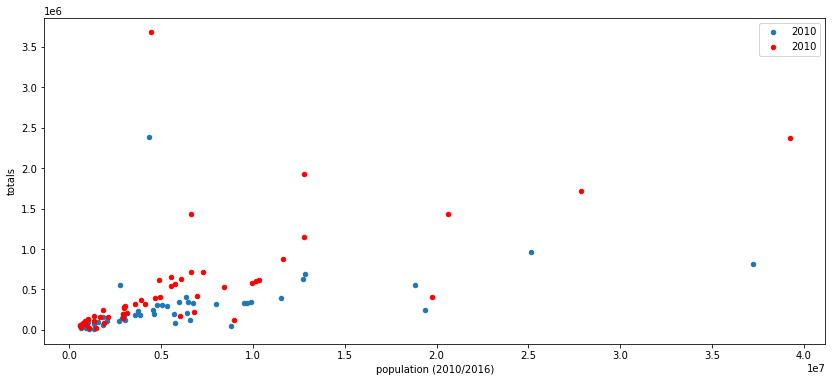

In [47]:
#scatterplot showing the relationship between totals and population estimates for both years
data_2010=gun_2010['totals'].to_frame().join(census['Population estimates base, April 1, 2010,  (V2016)'].to_frame())
data_2016=gun_2016['totals'].to_frame().join(census['Population estimates, July 1, 2016,  (V2016)'].to_frame())

fig, ax =plt.subplots(1, figsize=[14 ,6]);

data_2010.plot.scatter(x='Population estimates base, April 1, 2010,  (V2016)',y='totals',label='2010' ,ax=ax);
data_2016.plot.scatter(x='Population estimates, July 1, 2016,  (V2016)',y='totals',label='2010',color='red' ,ax=ax);
plt.xlabel('population (2010/2016)')
plt.legend();


#source : udacity reviews

In [48]:
#difference between gun capita for 2016 and 2010
capita_diff=gun_capita2016-gun_capita2010
capita_diff

state
Alabama           0.062297
Alaska            0.025342
Arizona           0.027826
Arkansas          0.023366
California        0.038651
Colorado          0.037743
Connecticut       0.038580
Delaware          0.040995
Florida           0.039889
Georgia           0.025058
Hawaii            0.003934
Idaho             0.034181
Illinois          0.096113
Indiana           0.163294
Iowa              0.023589
Kansas            0.017080
Kentucky          0.278928
Louisiana         0.030939
Maine             0.034127
Maryland          0.012216
Massachusetts     0.015508
Michigan          0.023151
Minnesota         0.061975
Mississippi       0.035168
Missouri          0.045392
Montana           0.028600
Nebraska          0.014578
Nevada            0.011536
New Hampshire     0.063014
New Jersey        0.007877
New Mexico        0.024503
New York          0.008037
North Carolina    0.024496
North Dakota      0.025038
Ohio              0.041313
Oklahoma          0.030574
Oregon            0.03

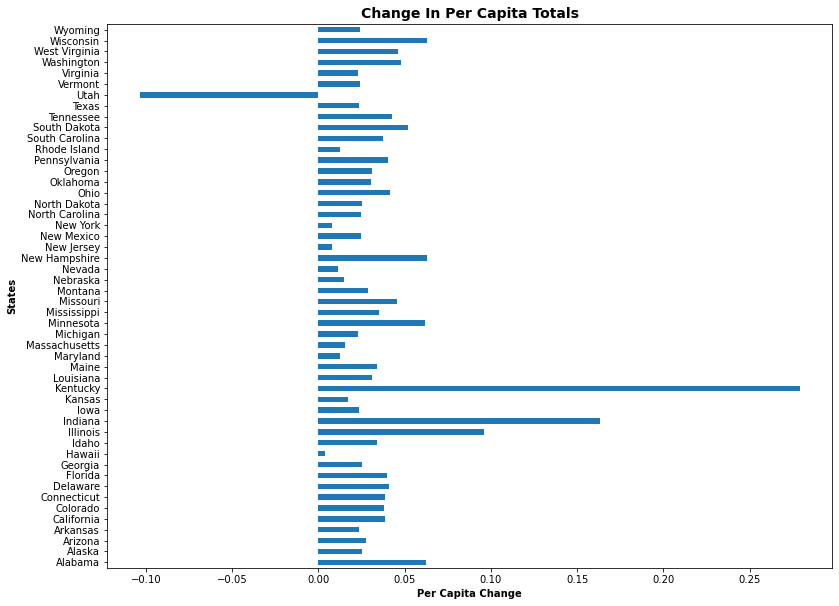

In [49]:
plt.figure(figsize=(13,10))
capita_diff.plot( kind='barh');
plt.title(f'Change in Per Capita Totals'.title(), fontsize=14, weight ='bold' )
plt.xlabel('per capita change'.title(), fontsize=10,weight='bold')
plt.ylabel('States'.title(), fontsize=10,weight='bold');

### Research Question 3  (States with the most improved Gun laws between 2010 and 2016)

In [50]:
gun_2010['licensed_gun%']=gun_2010['permit']/gun_2010['totals'] *100
gun_2016['licensed_gun%']=gun_2010['permit']/gun_2016['totals'] *100

In [51]:
(gun_2016['licensed_gun%']-gun_2010['licensed_gun%']).sort_values(ascending= False)

state
Utah              76.232353
Rhode Island       0.000000
New Jersey         0.000000
Maine              0.000000
Louisiana          0.000000
Oklahoma           0.000000
South Dakota       0.000000
Alaska             0.000000
Delaware           0.000000
Vermont            0.000000
Virginia           0.000000
Ohio              -0.000140
Wisconsin         -0.000335
Maryland          -0.002118
Florida           -0.003819
West Virginia     -0.038330
Oregon            -0.113264
Pennsylvania      -0.185224
Kansas            -0.741125
Alabama           -0.748363
Mississippi       -0.866847
Colorado          -1.905789
Montana           -2.008972
New Mexico        -2.402176
Missouri          -2.952332
North Dakota      -2.980378
Wyoming           -3.097412
Nevada            -3.714114
Arkansas          -4.583521
New York          -5.018888
Texas             -5.519272
Arizona           -6.066361
Idaho             -6.149428
Tennessee        -10.643011
South Carolina   -11.981879
Washington    

> I would like to also check the gun trends over the years

In [52]:
gun_df.groupby('year')[['handgun','long_gun','prepawn_handgun','prepawn_long_gun','redemption_handgun','redemption_long_gun']].sum()

,handgun,long_gun,prepawn_handgun,prepawn_long_gun,redemption_handgun,redemption_long_gun
year,,,,,,
2001,613182,1869918,1274,3266,26999,72322
2002,1823028,4387836,5082,11080,171050,392376
2003,1844597,4381438,5146,8656,181927,399702
2004,1972396,4483251,3943,6459,182539,390427
2005,2224403,4565139,3151,5782,183116,375702
2006,2421155,4765824,3141,5911,185679,355521
2007,2628639,4568770,2901,5504,180790,336230
2008,3325335,4906443,2330,4205,199205,348096
2009,3682418,4976957,2831,4846,222523,369491


>Above is the gun trends over the years with handgun coming out on top every year

<a id='conclusions'></a>
## Conclusions

> The major aim of this was to determine the states with strictest gun laws over the years in which i found out Hawaii had the best gun laws in place while in current years New jersey has the least and also i have also discovered all the states have increased gun per capita between 2016 and 2010 except 'Utah' ,which can be contributed to the increase of licensed guns to total number of guns in the state my guess is that stricter gun laws have been put in the state.

   >some of the limitations i faced in the data set includes the missing census data for a few states like Guam etc and missing data in the guns data set plus wrong data types for certain values for instance numbers saved as strings